In [3]:
import numpy as np
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential,load_model,model_from_json
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from PIL import Image
import matplotlib.pyplot as plt

#讀取資料
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#CNN的輸入為(長,寬,色彩) 1代表黑白 3代表彩色
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
#正規化圖像
x_train = x_train/255
x_test = x_test/255
#將label轉換為label
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#建構網路
model = Sequential()
#CNN輸入為28*28*1
model.add(Conv2D(32, kernel_size = 3, input_shape = (28,28,1),padding="same", activation = 'relu'))
#池化層
model.add(MaxPooling2D(pool_size = 2))
#攤平
model.add(Flatten())
#全連接層
model.add(Dense(16, activation = 'relu'))
#輸出層
model.add(Dense(10, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/10
469/469 [==============================] - 49s 100ms/step - loss: 0.3768 - accuracy: 0.8925 - val_loss: 0.1418 - val_accuracy: 0.9597
Epoch 2/10
469/469 [==============================] - 32s 68ms/step - loss: 0.1134 - accuracy: 0.9671 - val_loss: 0.0908 - val_accuracy: 0.9709
Epoch 3/10
469/469 [==============================] - 30s 64ms/step - loss: 0.0825 - accuracy: 0.9756 - val_loss: 0.0728 - val_accuracy: 0.9773
Epoch 4/10
469/469 [==============================] - 30s 65ms/step - loss: 0.0664 - accuracy: 0.9808 - val_loss: 0.0610 - val_accuracy: 0.9807
Epoch 5/10
469/469 [==============================] - 30s 64ms/step - loss: 0.0552 - accuracy: 0.9836 - val_loss: 0.0628 - val_accuracy: 0.9787
Epoch 6/10
469/469 [==============================] - 31s 66ms/step - loss: 0.0493 - accuracy: 0.9848 - val_loss: 0.0617 - val_accuracy: 0.9802
Epoch 7/10
469/469 [==============================] - 30s 64ms/step - 

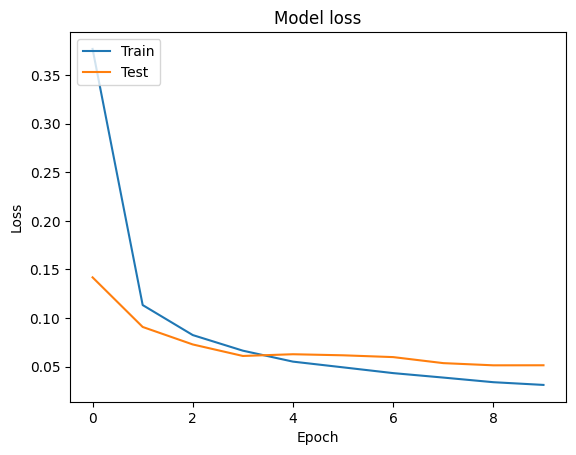

In [4]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [5]:
#儲存model(包含網路)
model.save('model.h5')
#讀取整個model
model = load_model('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [6]:
#只儲存權重
model.save_weights('model_weights.h5')
#需重新定義網路
model = Sequential()
model.add(Conv2D(32, kernel_size = 3, input_shape = (28,28,1),padding="same", activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Flatten())
model.add(Dense(16, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
#讀取權重
model.load_weights('model_weights.h5')

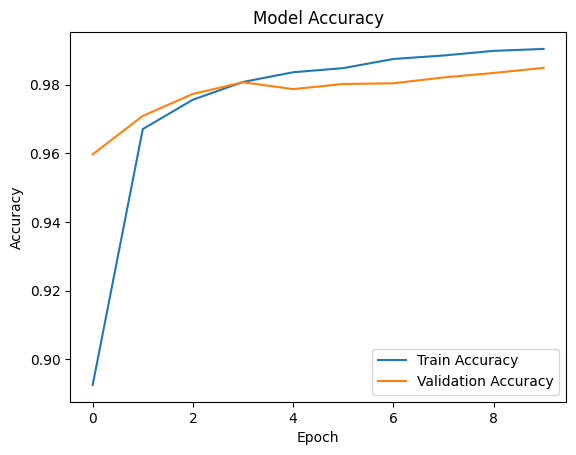

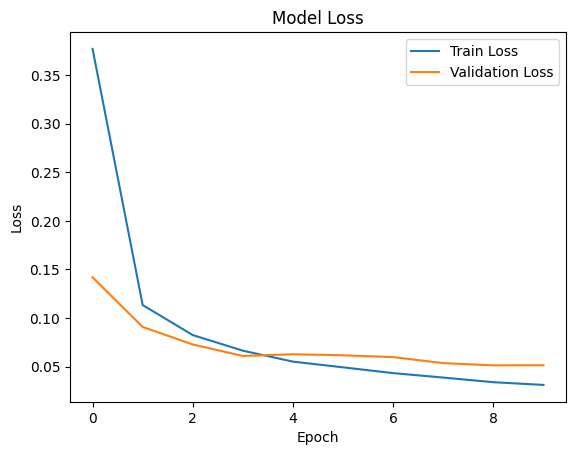

In [7]:
# 绘制训练和验证准确率
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 绘制训练和验证损失
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# 加载MNIST数据集
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_test = x_test / 255.0  # 归一化数据


In [9]:
model = keras.models.load_model('model.h5')  # 请将 'path_to_your_saved_model' 替换为您的模型文件路径


In [10]:
model

In [11]:
pip install tf-keras-vis


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 1.6 MB/s eta 0:00:00


In [12]:
from matplotlib import cm
import matplotlib.pyplot as plt
from tf_keras_vis.gradcam import Gradcam,GradcamPlusPlus
from tensorflow.keras import backend as K
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize
def Grad_CAM_savepictures(file_index,model,save_name):
  def loss(output):
    return (output[0][y_test[file_index]])
  def model_modifier(m):
    m.layers[-1].activation = tf.keras.activations.linear
    return m
  # Create Gradcam object
  gradcam = Gradcam(model,model_modifier=model_modifier,clone=False)
  originalimage=x_test[file_index]
  originalimage=originalimage.reshape((1,originalimage.shape[0],originalimage.shape[1],1))

  # Generate heatmap with GradCAM
  cam = gradcam(loss,originalimage,penultimate_layer=-1)
  cam = normalize(cam)

  #overlap image
  ax1=plt.subplot(1, 3, 1)
  heatmap = np.uint8(cm.jet(cam)[..., :3] * 255)
  ax1.imshow(x_test[file_index].reshape((x_test.shape[1],x_test.shape[2])),cmap="gray")
  ax1.imshow(heatmap.reshape((x_test.shape[1],x_test.shape[2],3)), cmap='jet', alpha=0.4) # overlay
  ax1.set_title("Grad-CAM")

  gradcam = GradcamPlusPlus(model,model_modifier=model_modifier,clone=False)
  cam = gradcam(loss,originalimage,penultimate_layer=-1)
  cam = normalize(cam)

  ax1=plt.subplot(1, 3, 2)
  heatmap = np.uint8(cm.jet(cam)[..., :3] * 255)
  ax1.imshow(x_test[file_index].reshape((x_test.shape[1],x_test.shape[2])),cmap="gray")
  ax1.imshow(heatmap.reshape((x_test.shape[1],x_test.shape[2],3)), cmap='jet', alpha=0.4) # overlay
  ax1.set_title("Grad-CAMPlusPlus")

  plt.savefig(save_name)
  plt.show()

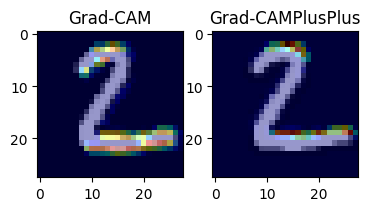

In [15]:
# 选择一个测试图像的索引和文件名
file_index = 1  # 替换为你想要的测试图像的索引
save_name = "grad_cam_result.png"  # 替换为你想要的保存文件名

# 调用 Grad_CAM_savepictures 函数生成结果
Grad_CAM_savepictures(file_index, model, save_name)
